# day 390

# signal processing:

# $$ \text{signal processing} = \text{decision making} + \text{tools} $$

* decision making may change from fields to fields but the tools used won't change.
* for example signal processing is used in audio signal processing, video processing, image processing, control systems, financial signal detections to avert risky ventures, the decisions made in each of these fields may vary but the mathematical tool used to detect signals won't change.

## some tools:
1. Filters
2. Convolutions.
3. Wavelets.
4. Spectra(FFT).
5. Time Frequency
6. cleaning/denoising.
7. resampling.
8. interpolation, extrapolation.
9. Feature detection and feature extraction.
10. SNR/RMS - signal to noise ratio / root mean square.

# day 391

# Mean Smoothing filter:

![sfsf](Images/200624_sig.png)

* The key parameter of the filter is the number of data points you go in past and the number of data points you go in future from the current data point.

## Edge effects:
![sfsf](Images/200624_sig1.png)

* Edge effects is whenever you apply a filter to the data, the edges are disregarded.
* so we can do two things with the edge data points:
  1. just connect the filter last points to the edges of the original data like whiskers to the cat.
  2. simply ignore them
* there is no universal right method when it comes to handling the edges of the original data.

## video reference:
[watch this video for better understanding](https://www.udemy.com/course/signal-processing/learn/lecture/11864618#overview)

In [1]:
# code
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

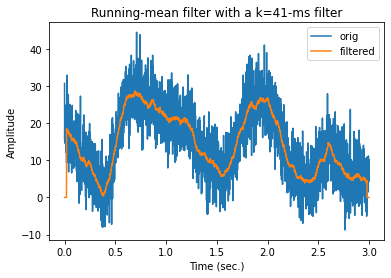

In [7]:
# create signal
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 15 # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl   = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise  = noiseamp * np.random.randn(n)
signal = ampl + noise

# initialize filtered signal vector
filtsig = np.zeros(n)

# implement the running mean filter
k = 20 # filter window is actually k*2+1
for t in range(k,n-k):
    # each point is the average of k surrounding points
    filtsig[t] = np.mean(signal[t-k:t+k+1])

# compute window size in ms
windowsize = 1000*(k*2+1) / srate


# plot the noisy and filtered signals
plt.plot(time,signal,label='orig')
plt.plot(time,filtsig,label='filtered')
# plt.plot(time,filtsig/windowsize,label='normalized filter')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()


## exploration, ablation-analysis and freethrows

In [3]:
ampl

array([26.79146814, 26.78819368, 26.78491921, ...,  8.98167198,
        8.98167198,  8.98167198])

In [4]:
len(ampl)

3000

In [3]:
len(filtsig)

3000

`numpy.interp` is a function in NumPy used for 1-dimensional linear interpolation. It returns the one-dimensional piecewise linear interpolant to a function with given values at discrete data points.

Here are the parameters of `numpy.interp`:

- `x`: The x-coordinates at which to evaluate the interpolated values.
- `xp`: The x-coordinates of the data points, must be increasing.
- `fp`: The y-coordinates of the data points, same length as `xp`.

The basic idea is to estimate the value at a given point `x` based on linear interpolation of the data points provided by `xp` and `fp`.

Let's go through five examples to understand how it works:

### Explanation of How it Works:

1. **Finding the Interval**: For each `x`, `numpy.interp` identifies the interval `[xp[i], xp[i+1]]` such that `xp[i] <= x < xp[i+1]`.
2. **Linear Interpolation**: Within the interval, the interpolated value is computed using the formula:
   
   $
   y = fp[i] + (x - xp[i]) \cdot \frac{fp[i+1] - fp[i]}{xp[i+1] - xp[i]}
   $

3. **Extrapolation**: If `x` is outside the range of `xp`, the value is extrapolated using the nearest value in `fp`.

These examples should give you a clear understanding of how `np.interp` works for linear interpolation in one dimension.

### Example 1: Simple Linear Interpolation

```python
import numpy as np

x = [2.5]
xp = [1, 2, 3]
fp = [1, 4, 9]

# Interpolate at x = 2.5
y = np.interp(x, xp, fp)
print(y)  # Output: [6.5]
```
In this example, the value at `x=2.5` is interpolated between the points (2,4) and (3,9). The result is `6.5`.

### Example 2: Interpolating Multiple Points

```python
x = [1.5, 2.5, 3.5]
xp = [1, 2, 3, 4]
fp = [1, 4, 9, 16]

# Interpolate at multiple points
y = np.interp(x, xp, fp)
print(y)  # Output: [2.5 6.5 12.5]
```
Here, values at `x=[1.5, 2.5, 3.5]` are interpolated. The result is `[2.5, 6.5, 12.5]`.

### Example 3: Extrapolation

```python
x = [0.5, 4.5]
xp = [1, 2, 3, 4]
fp = [1, 4, 9, 16]

# Extrapolate outside the data range
y = np.interp(x, xp, fp)
print(y)  # Output: [1.  16.]
```
Values outside the range of `xp` will be extrapolated using the boundary values of `fp`. Here, `x=0.5` is extrapolated to `fp[0]` (1), and `x=4.5` is extrapolated to `fp[-1]` (16).

### Example 4: Interpolation with Non-uniformly Spaced Points

```python
x = [1.5, 3.5]
xp = [1, 2, 4]
fp = [1, 4, 16]

# Interpolate at non-uniformly spaced points
y = np.interp(x, xp, fp)
print(y)  # Output: [2.5 10. ]
```
In this case, the points in `xp` are not evenly spaced. The interpolation still works and gives values at `x=[1.5, 3.5]` as `[2.5, 10.0]`.

### Example 5: Interpolating with More Complex Data

```python
x = [1.5, 2.5, 3.5]
xp = [1, 2, 3, 4]
fp = [2, 8, 18, 32]

# Interpolate with more complex data
y = np.interp(x, xp, fp)
print(y)  # Output: [ 5. 13. 25.]
```
For more complex data, `x=[1.5, 2.5, 3.5]` gives interpolated values `[5.0, 13.0, 25.0]`.



In [10]:
# teasing the np.interp
a = np.arange(0,12,2)
b = np.arange(1,12,2)
kunji = np.arange(0,10,1)
a,b,kunji

(array([ 0,  2,  4,  6,  8, 10]),
 array([ 1,  3,  5,  7,  9, 11]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [12]:
np.interp(2,a,b)

3.0

In [3]:
time

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 2.997e+00, 2.998e+00,
       2.999e+00])

In [4]:
len(time)

3000

In [8]:
windowsize

41.0

## conclusion:
* the basic idea is to calculate the mean of the signal from t-k to t+k.
* k inversely proportional to hz; if you increase hz will reduce and vice versa.


# day 393

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

# Guassian smoothing time-series filter

![fsdf](images/240624_stat.png)

* $g$ is a guassian function. 
* The total area under the $g$, the guassian function, is 1, in other words, the total probability density curve of $g$ adds upto 1.

## how does a guassian function look? and the mechanisms of guassian function:
![fsdf](images/240624_sig.png)

* The general form of guassian function is: $$ \frac{e^{-t^{2}}}{variance} $$
* w is the width or the standard deviation of the curve.
* full width at half maximum is the width of the curve(std) when the probability is at 0.5
* the smoothness of the guassian curve is determined by the width(std). so, if you want 10 milliseconds of smoothness in a time series data, then setting the $w^2$ with 10 would fit the bill.

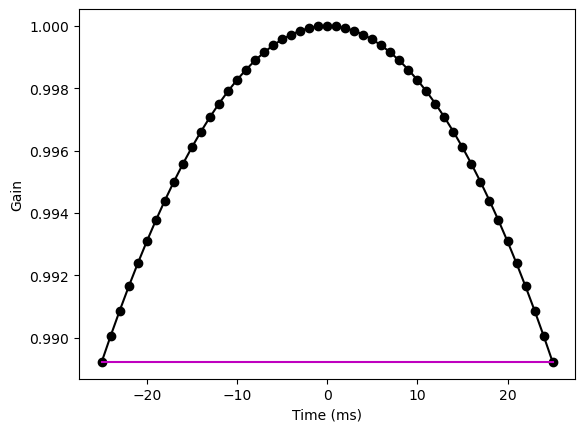

In [30]:
# code
# create signal
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 15 # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl   = np.interp(np.linspace(1,p,n),np.arange(0,p),np.random.rand(p)*30)
noise  = noiseamp * np.random.randn(n)
signal = ampl + noise



## create Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 400 # in ms

# normalized time vector in ms
k = 25
gtime = 1000*np.arange(-k,k+1)/srate

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

# compute empirical FWHM
pstPeakHalf = k + np.argmin( (gauswin[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauswin-.5)**2 )

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

# show the Gaussian
plt.plot(gtime,gauswin,'ko-') # gtime is xaxis and guaswin is in y axis.
plt.plot([gtime[prePeakHalf],gtime[pstPeakHalf]],[gauswin[prePeakHalf],gauswin[pstPeakHalf]],'m')

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)
# title([ 'Gaussian kernel with requeted FWHM ' num2str(fwhm) ' ms (' num2str(empFWHM) ' ms achieved)' ])
plt.xlabel('Time (ms)')
plt.ylabel('Gain')

plt.show()

## exploration, ablation-analysis and freethrows

In [6]:
prePeakHalf = np.argmin( (gauswin-.5)**2 )


In [7]:
pstPeakHalf

123

In [8]:
(gauswin-.5)**2 

array([0.24999998, 0.24999997, 0.24999996, 0.24999995, 0.24999993,
       0.24999991, 0.24999988, 0.24999985, 0.24999981, 0.24999975,
       0.24999968, 0.24999959, 0.24999948, 0.24999934, 0.24999916,
       0.24999894, 0.24999867, 0.24999833, 0.2499979 , 0.24999738,
       0.24999673, 0.24999594, 0.24999497, 0.24999378, 0.24999232,
       0.24999056, 0.24998843, 0.24998585, 0.24998274, 0.249979  ,
       0.24997453, 0.24996919, 0.24996284, 0.2499553 , 0.24994637,
       0.24993583, 0.24992344, 0.2499089 , 0.24989189, 0.24987206,
       0.24984902, 0.2498223 , 0.24979144, 0.24975588, 0.24971504,
       0.24966829, 0.24961492, 0.24955419, 0.24948529, 0.24940739,
       0.24931956, 0.24922086, 0.24911029, 0.24898683, 0.2488494 ,
       0.24869693, 0.24852831, 0.24834244, 0.24813825, 0.24791465,
       0.24767064, 0.24740525, 0.24711759, 0.24680686, 0.24647241,
       0.24611367, 0.24573027, 0.245322  , 0.24488883, 0.24443097,
       0.24394884, 0.24344311, 0.24291472, 0.24236485, 0.24179

In [9]:
np.argmin((gauswin-.5)**2 )

100

In [9]:
len(signal)

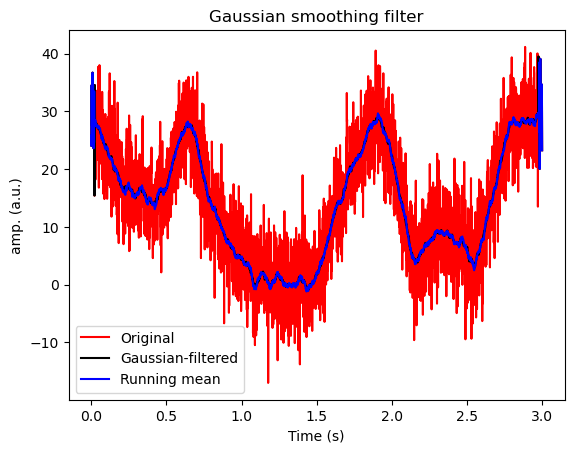

In [32]:
# implement the filter

# initialize filtered signal vector
filtsigG = copy.deepcopy(signal)

# # implement the running mean filter
for i in range(k+1,n-k): #101 to 2900
    # each point is the weighted average of k surrounding points
    filtsigG[i] = np.sum( signal[i-k:i+k+1]*gauswin )

# plot
plt.plot(time,signal,'r',label='Original')
plt.plot(time,filtsigG,'k',label='Gaussian-filtered')

plt.xlabel('Time (s)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Gaussian smoothing filter')

## for comparison, plot mean smoothing filter

# initialize filtered signal vector
filtsigMean = copy.deepcopy(signal)

# implement the running mean filter
# note: using mk instead of k to avoid confusion with k above
mk = 20 # filter window is actually mk*2+1
for i in range(mk+1,n-mk-1):
    # each point is the average of k surrounding points
    filtsigMean[i] = np.mean(signal[i-mk:i+mk+1])

plt.plot(time,filtsigMean,'b',label='Running mean')

# plt.ylim([10,30])
plt.legend()
plt.show()

if you increase the k to larger values then the edge effect would be very large so,keep the k as low a number as you possibly can

## exploration,ablation-analysis and freethrows

In [16]:
copy.deepcopy(signal)

array([ 1.0674759 , 13.04056651, 13.13342133, ..., 18.01460249,
       11.6271124 , 12.58062735])

In [16]:
signal[1:101+100+1]

array([10.47190403, -4.81835231,  0.88747753, 12.096444  ,  3.86505658,
        6.44933608, 18.4750082 , 10.41095482,  2.64597468, 16.00351612,
        1.00371288,  5.88954378, 10.71067444, 10.86500479,  3.19881979,
       10.65637894, 19.45607168, 10.87045942,  9.13291024,  9.26798072,
        5.08339964,  4.98218131, 13.39745699, 16.25376577, 10.8112357 ,
       11.40806692,  6.4608491 , 12.24176135,  3.77199783, 10.43988347,
        5.2000211 , 11.19231105,  8.86300005, 10.43132257, 14.11052175,
        8.14472817, 17.83365538, 17.75866614,  5.18127403,  6.49986733,
        5.56279844, 13.53613385, 10.89425586, -2.93012389, -2.96469342,
       -2.20929059,  6.9760182 ,  9.72592878, 11.86727297,  8.34216276,
       10.08464081, 11.26443609, 11.02917491, 12.95492123,  8.68596084,
        8.28021679,  7.47811561, 17.71278257, 11.7466413 ,  4.97077193,
        7.72028183,  6.31955712,  4.5340808 ,  6.77132588, 17.25175334,
        1.04008367,  7.26341929,  2.33851789,  0.56193759,  9.01

In [17]:
k = 100
i = 101
signal[i-k:i+k+1]

array([10.47190403, -4.81835231,  0.88747753, 12.096444  ,  3.86505658,
        6.44933608, 18.4750082 , 10.41095482,  2.64597468, 16.00351612,
        1.00371288,  5.88954378, 10.71067444, 10.86500479,  3.19881979,
       10.65637894, 19.45607168, 10.87045942,  9.13291024,  9.26798072,
        5.08339964,  4.98218131, 13.39745699, 16.25376577, 10.8112357 ,
       11.40806692,  6.4608491 , 12.24176135,  3.77199783, 10.43988347,
        5.2000211 , 11.19231105,  8.86300005, 10.43132257, 14.11052175,
        8.14472817, 17.83365538, 17.75866614,  5.18127403,  6.49986733,
        5.56279844, 13.53613385, 10.89425586, -2.93012389, -2.96469342,
       -2.20929059,  6.9760182 ,  9.72592878, 11.86727297,  8.34216276,
       10.08464081, 11.26443609, 11.02917491, 12.95492123,  8.68596084,
        8.28021679,  7.47811561, 17.71278257, 11.7466413 ,  4.97077193,
        7.72028183,  6.31955712,  4.5340808 ,  6.77132588, 17.25175334,
        1.04008367,  7.26341929,  2.33851789,  0.56193759,  9.01

In [18]:
k = 100
i = 101
signal[i-k:i+k+1]* gauswin

array([ 2.13321050e-20, -2.37300369e-20,  1.04735967e-20,  3.39063963e-19,
        2.55042185e-19,  9.93002268e-19,  6.57878592e-18,  8.49814966e-18,
        4.90725936e-18,  6.68397890e-17,  9.35712224e-18,  1.21471508e-16,
        4.84413644e-16,  1.06802905e-15,  6.77397092e-16,  4.81848418e-15,
        1.86187269e-14,  2.18214489e-14,  3.81182145e-14,  7.97155364e-14,
        8.93086269e-14,  1.77209423e-13,  9.56234907e-13,  2.30737389e-12,
        3.02557474e-12,  6.23821010e-12,  6.84226261e-12,  2.48864569e-11,
        1.45897023e-11,  7.61505948e-11,  7.08977125e-11,  2.82711303e-10,
        4.11099788e-10,  8.80634698e-10,  2.14899904e-09,  2.21795787e-09,
        8.60691339e-09,  1.50554793e-08,  7.64794580e-09,  1.65570723e-08,
        2.42376218e-08,  9.99898152e-08,  1.35229038e-07, -6.05782115e-08,
       -1.01184769e-07, -1.23378620e-07,  6.31819747e-07,  1.41599597e-06,
        2.75279595e-06,  3.05591113e-06,  5.78240205e-06,  1.00205120e-05,
        1.50870004e-05,  

# Guassian smooth to a spike-time series

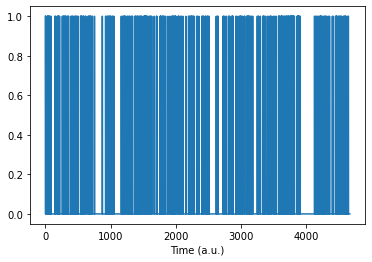

In [2]:
## generate time series of random spikes

# number of spikes
n = 300

# inter-spike intervals (exponential distribution for bursts)
isi = np.round(np.exp( np.random.randn(n) )*10)

# generate spike time series
spikets = np.zeros(int(np.sum(isi)))

for i in range(0,n):
    spikets[ int(np.sum(isi[0:i])) ] = 1 # it fills some space with 1's and some with 0's


# plot
plt.plot(spikets)
plt.xlabel('Time (a.u.)')
plt.show()

## exploration, ablation-analysis and freethrows

In [39]:
len(isi)

300

In [34]:
np.sum(isi)

5111.0

In [42]:
len(spikets)

5111

In [37]:
isi[0:3]

array([23., 31., 29.])

In [35]:
isi[0:23]

array([23., 31., 29., 33., 19., 80.,  3.,  3., 12., 22., 19.,  5.,  3.,
        7., 62.,  4.,  1., 47.,  7.,  9., 17., 58., 10.])

In [38]:
np.sum(isi[0:23])

504.0

In [3]:
# why is it zero at 4000th index of spikets
spikets[4000]

0.0

In [9]:
# not only did we not have values of 4000 but between 3911 and 4132 there is a gap

np.cumsum(isi,dtype=int) 

array([   4,    4,   28,   35,   37,   46,   55,   61,   66,   86,  148,
        153,  180,  188,  197,  201,  204,  217,  260,  271,  278,  286,
        297,  301,  310,  319,  338,  347,  355,  393,  397,  417,  421,
        443,  456,  466,  472,  488,  500,  540,  544,  552,  556,  573,
        582,  589,  612,  619,  657,  659,  674,  679,  691,  694,  710,
        720,  753,  874,  924,  932,  954,  962,  973,  980,  990,  995,
       1007, 1025, 1033, 1052, 1165, 1183, 1201, 1205, 1215, 1220, 1230,
       1257, 1267, 1283, 1283, 1292, 1314, 1325, 1337, 1372, 1384, 1390,
       1405, 1414, 1420, 1437, 1449, 1459, 1467, 1476, 1500, 1515, 1519,
       1524, 1527, 1538, 1541, 1543, 1549, 1561, 1574, 1596, 1612, 1617,
       1632, 1671, 1705, 1713, 1761, 1766, 1770, 1788, 1795, 1808, 1811,
       1825, 1845, 1881, 1914, 1936, 1952, 1958, 1961, 1972, 1979, 1994,
       1996, 2002, 2003, 2036, 2043, 2052, 2076, 2088, 2113, 2158, 2198,
       2206, 2214, 2228, 2241, 2244, 2251, 2262, 22

In [15]:
spikets[3911],spikets[3912],spikets[3985],spikets[4131],spikets[4132]

(1.0, 0.0, 0.0, 0.0, 1.0)

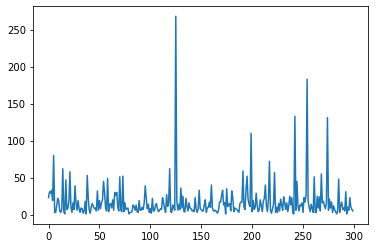

In [44]:
plt.plot(isi);

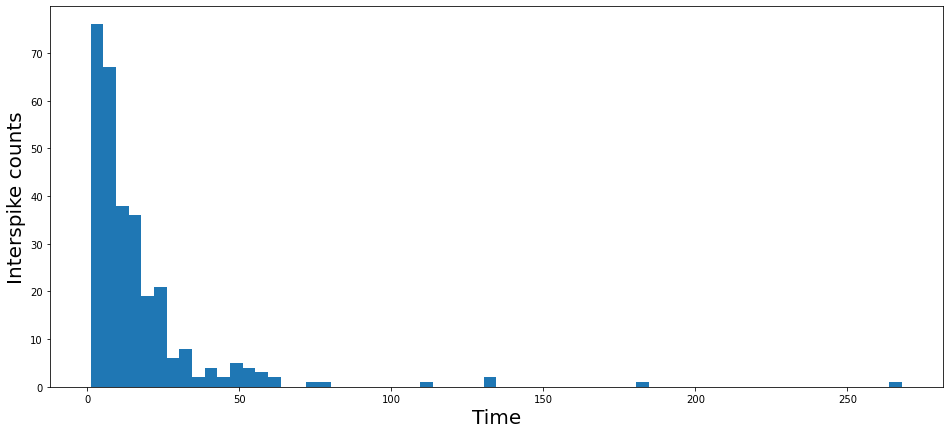

In [52]:
plt.figure(figsize=(16,7))
plt.hist(isi,bins='fd')
plt.xlabel('Time',fontsize=20)
plt.ylabel('Interspike counts',fontsize=20)
plt.show()

* longer the spikes duration the lesser its probability to see an interspike interval

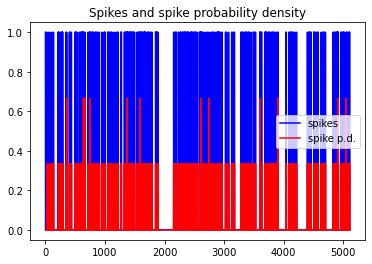

In [61]:
## create and implement Gaussian window

# full-width half-maximum: the key Gaussian parameter
fwhm = 25 # in points

# normalized time vector in ms
k = 1;
gtime = np.arange(-k,k+1)

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
gauswin = gauswin / np.sum(gauswin) # unit normalized

# initialize filtered signal vector
filtsigG = np.zeros(len(spikets))

# implement the weighted running mean filter
for i in range(k+1,len(spikets)-k): # 101 to 5011
    filtsigG[i] = np.sum( spikets[i-k:i+k+1]*gauswin )


# plot the filtered signal (spike probability density)
plt.plot(spikets,'b',label='spikes')
plt.plot(filtsigG,'r',label='spike p.d.')
plt.legend()
plt.title('Spikes and spike probability density')
plt.show()

## exploration, ablation-analysis and freethrows

In [41]:
len(spikets)

5111

In [43]:
5111-100

5011

## conclusion:
* if you decrease k the probability of the spike occurence increases(try k=1) and viceversa(if you increase k, the probability of spike occurence decreases to almost zero probability(it becomes a flat red line try with k=12345))

# day 394

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

# Denoising the noise from the signals:

## EMG signal:
![fsfsd](images/260624_sig.png)
* EMG- Electro MyoGram. Gram stands for measurement. Myo means muscle. Electro means electricity ofcourse.
* it measures the muscle movements of the body.
* it is used by neurologists to measure abnormal muscle twitches caused by agitated nerves.

![fsfsd](images/260624_sig1.png)

## TKEO to denoise any signal 
![sdfsd](images/260624_sig2.png)

* this tkeo operator can help denoise any signal of any kind not just EMG.


## video reference:
[watch this video to understand the concept better](https://www.udemy.com/course/signal-processing/learn/lecture/11864588?start=0#questions)

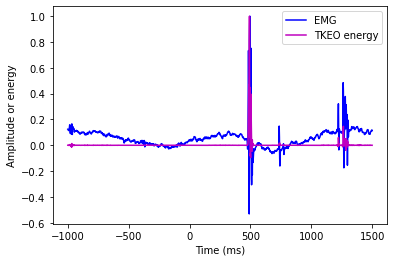

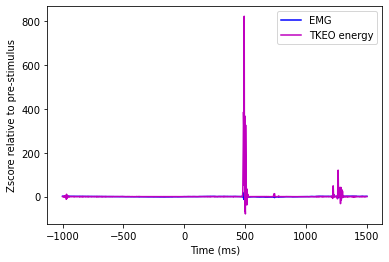

In [2]:
# import data
emgdata = sio.loadmat('time_series_denoising/emg4TKEO.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# initialize filtered signal
emgf = copy.deepcopy(emg) # just like zero filling i guess

# the loop version for interpretability
for i in range(1,len(emgf)-1):
    emgf[i] = emg[i]**2 - emg[i-1]*emg[i+1]

# the vectorized version for speed and elegance
emgf2 = copy.deepcopy(emg)
emgf2[1:-1] = emg[1:-1]**2 - emg[0:-2]*emg[2:]

## convert both signals to zscore
# find timepoint zero
time0 = np.argmin(emgtime**2) # why find this? it is explained in analysis

# convert original EMG to z-score from time-zero
emgZ = (emg-np.mean(emg[0:time0])) / np.std(emg[0:time0])

# same for filtered EMG energy
emgZf = (emgf-np.mean(emgf[0:time0])) / np.std(emgf[0:time0])


## plot
# plot "raw" (normalized to max.1)
plt.plot(emgtime,emg/np.max(emg),'b',label='EMG')
plt.plot(emgtime,emgf/np.max(emgf),'m',label='TKEO energy')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude or energy')
plt.legend()

plt.show()

# plot zscored
plt.plot(emgtime,emgZ,'b',label='EMG')
plt.plot(emgtime,emgZf,'m',label='TKEO energy')

plt.xlabel('Time (ms)')
plt.ylabel('Zscore relative to pre-stimulus')
plt.legend()
plt.show()

## exploration, ablation-analysis and freethrows

## answer from chatGPT:
In your professor's code, the variable `time0` is calculated using the line:

```python
time0 = np.argmin(emgtime**2)
```

This line finds the index of the minimum value in the array `emgtime**2`. Essentially, it's finding the time point closest to zero in the `emgtime` array, which represents the time axis of your EMG data.

The significance of `time0` is related to the z-score normalization that follows:

```python
# convert original EMG to z-score from time-zero
emgZ = (emg - np.mean(emg[0:time0])) / np.std(emg[0:time0])

# same for filtered EMG energy
emgZf = (emgf - np.mean(emgf[0:time0])) / np.std(emgf[0:time0])
```

In these lines, the EMG signals (`emg` and `emgf`) are being converted to z-scores, but the normalization is done relative to the pre-stimulus period (the period before `time0`). This means that the mean and standard deviation used for z-score normalization are calculated from the data before the stimulus event, which is assumed to occur at `time0`.

### Why Find `time0`?

1. **Baseline Normalization**: By using the pre-stimulus period (data before `time0`) to calculate the mean and standard deviation, the code ensures that the z-score normalization reflects changes in the EMG signal relative to the baseline activity. This is a common technique in signal processing to highlight the effect of a stimulus by normalizing against the baseline activity.

2. **Stability**: The pre-stimulus period is typically more stable and less variable, providing a reliable baseline for normalization. Using this period helps to reduce the influence of any transient or outlier values that may occur after the stimulus.

3. **Comparative Analysis**: Normalizing to a pre-stimulus baseline allows for easier comparison across different trials or subjects. It standardizes the data, making it easier to compare the relative changes induced by the stimulus.

In summary, `time0` represents the time point closest to zero, which is used to define the pre-stimulus period for z-score normalization. This helps to highlight the relative changes in the EMG signal due to the stimulus, providing a clearer and more consistent analysis.

In [6]:
len(emgf2)

1281

In [4]:
time0

512

In [3]:
emgtime # this is why we square it to get zero time as the lowest time point 

array([-1000.      ,  -998.046875,  -996.09375 , ...,  1496.09375 ,
        1498.046875,  1500.      ])

In [9]:
emgtime**2

array([1000000.        ,  996097.56469727,  992202.75878906, ...,
       2238296.50878906, 2244144.43969727, 2250000.        ])

In [10]:
np.argmin(emgtime**2)

512

In [12]:
emgf

array([ 59.18904, -55.75812, 155.35956, ...,  53.54448, 192.29138,
        53.86403], dtype=float32)

In [11]:
emgf[0:time0]

array([ 5.91890411e+01, -5.57581215e+01,  1.55359558e+02, -2.38767624e+02,
        1.10970634e+02, -3.32240082e+02, -5.85129128e+01, -5.68126221e+01,
        1.32652588e+03,  5.68247620e+02, -4.34970276e+02, -9.74574707e+02,
        9.07826477e+02, -1.03227100e+03,  1.42818787e+03,  2.07403931e+03,
       -3.97714355e+03,  3.50789941e+03,  1.30609082e+03, -2.33782886e+03,
        7.74117798e+02,  6.88378296e+02, -1.92595016e+02,  5.25523010e+02,
       -4.17623291e+02, -5.48006401e+01,  5.03918610e+02, -9.54642792e+01,
       -4.69085541e+02,  2.04697403e+02, -3.05343556e+00,  5.84354134e+01,
       -6.65672150e+01,  1.28961609e+02, -8.81285172e+01, -1.59517593e+02,
        1.87202042e+02,  7.87090073e+01, -9.16868286e+01, -6.61338043e+01,
        1.64641968e+02,  6.15463638e+01, -1.93126526e+02, -1.43070965e+01,
        1.80985794e+02, -4.30451698e+01, -8.65054474e+01,  1.39786148e+02,
       -1.20377251e+02,  9.59838943e+01, -1.27030327e+02,  1.30404968e+02,
       -1.25250740e+02, -

## conclusion:
* we have denoised the signal to see only the significant part.
* we understood that Tkeo converts the signal to energy.
* the z-score version helped us understand how many standard deviations are the signals away from the mean.
* one large spike that is about 800 std away from mean is observed pointing to how much of a outlier it actually is.

# day 397

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

# Median filter to remove spike noise: outlier removal

## median filter is robust to outliers
![sfsd](images/290624_sig.png)
![sfsd](images/290624_sig1.png)
![sfsd](images/290624_sig2.png)

## notes:
* median is non-linear filter so apply this only to selected data points not all data points,only to data that seem to have unusual outliers. median is robust to outliers.

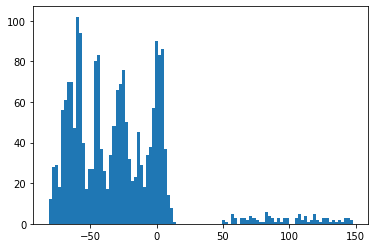

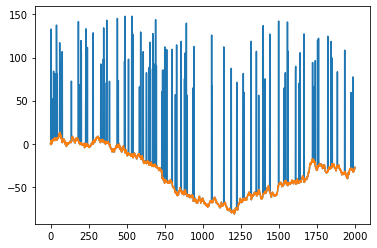

In [2]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))


# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100


# use hist to pick threshold
plt.hist(signal,100)
plt.show()

# visual-picked threshold
threshold = 40


# find data values above the threshold
suprathresh = np.where( signal>threshold )[0]

# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1

# any value in signal greater than the threshold are going to be replaced with the median of sorrounding numbers around it.
for ti in range(len(suprathresh)):

    # lower and upper bounds
    lowbnd = np.max((0,suprathresh[ti]-k)) # 20 points backward
    uppbnd = np.min((suprathresh[ti]+k+1,n)) # 20 points forward

    # compute median of surrounding points
    filtsig[suprathresh[ti]] = np.median(signal[lowbnd:uppbnd])

# plot
plt.plot(range(0,n),signal, range(0,n),filtsig)
plt.show()


## exploration, ablation-analysis and freethrows

In [9]:
n = 2000
signal = np.cumsum(np.random.randn(n))
signal

array([  0.30146502,   0.68484125,  -1.08276162, ..., -38.81138936,
       -39.39728915, -39.61927059])

In [6]:
# how to infuse noise into a small portion of the data
n = 2000

# randomly shuffle the indices so that we can infuse noise in random places
noisepnts = np.random.permutation(n) 
noisepnts

array([ 953,  921, 1524, ...,  952, 1783,  245])

In [7]:
noisepnts = noisepnts[0:int(0.05*n)] # take only 5% of the noisepnts
noisepnts

array([ 953,  921, 1524,  729,  555, 1889,   36,  682, 1493,   14, 1333,
         87,  727, 1944,   97,   94,  817,  175, 1643, 1427,  598,  463,
       1559,  978, 1867, 1262,  792,  804,  201, 1561,  402, 1335, 1694,
        266,  170, 1225, 1659,   98,  543,  872,  431,  487, 1065, 1470,
       1297,  246,   29, 1384,  285,  146,  262,   32,  157, 1343,  316,
        731,   19, 1977, 1754,  105, 1149,  789,  728, 1084, 1803,  712,
         49, 1727, 1830, 1774, 1569,  990,  498, 1019, 1624,  107, 1285,
        523, 1999,  586,  283, 1651,  428, 1216,  699, 1473,  438,  188,
       1838, 1404,  624,  941,  417,  758, 1179,  999, 1324, 1814, 1868,
        261])

In [10]:
# fillthose spaces in real signal with noise
signal[noisepnts]  = 50+np.random.rand(len(noisepnts))*100
signal

array([  0.30146502,   0.68484125,  -1.08276162, ..., -38.81138936,
       -39.39728915, 119.40803544])

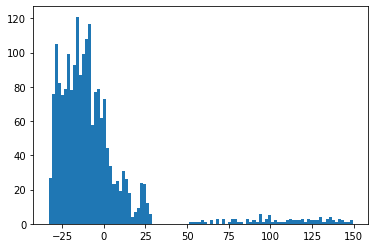

In [12]:
#  use hist to pick threshold
plt.hist(signal,100)
plt.show()


In [15]:
# find data values above the threshold
suprathresh = np.where( signal>threshold )[0]
suprathresh

array([   1,    8,   46,   51,   82,  102,  144,  146,  150,  163,  213,
        222,  227,  242,  245,  265,  266,  273,  291,  295,  309,  315,
        317,  325,  336,  343,  356,  373,  399,  404,  422,  492,  494,
        499,  510,  530,  537,  565,  590,  610,  667,  743,  765,  837,
        840,  841,  843,  854,  858,  916,  932,  948,  949,  959, 1053,
       1074, 1087, 1093, 1121, 1155, 1181, 1191, 1242, 1244, 1248, 1259,
       1267, 1272, 1310, 1321, 1333, 1347, 1441, 1445, 1460, 1467, 1485,
       1518, 1522, 1580, 1586, 1657, 1683, 1691, 1697, 1698, 1706, 1715,
       1717, 1736, 1747, 1758, 1766, 1792, 1801, 1804, 1902, 1904, 1934,
       1985], dtype=int64)

In [16]:
filtsig = copy.deepcopy(signal)
filtsig

array([ -1.04760026, 109.6604838 ,  -0.67476067, ...,  27.86560418,
        27.57246066,  28.1002976 ])

In [17]:
signal

array([ -1.04760026, 109.6604838 ,  -0.67476067, ...,  27.86560418,
        27.57246066,  28.1002976 ])

ERROR! Session/line number was not unique in database. History logging moved to new session 1780


In [3]:
lowbnd

1967

In [4]:
uppbnd

2000

In [5]:
uppbnd-lowbnd # these are the last few points that's why they are 33 otherwise the difference would be 40; 2*k

33

## why choose lowbnd and uppbnd

* our goal is to get t-k and t+k in suprathreshold indices but it could happen that suprathreshold[i]-k could go beyond the indices of the original data and so will suprathreshold[i]+k, so in an attempt to make the t-k and t+k not go beyond the actual number of indices in the original data we want to make sure that the lowerbnd is np.max(0,suprathersh[i]-k) and uppbnd is np.min(n,suprathreshold[i]+k+1)

# Linear Detrending

![fsddf](images/290624_sig3.png)


## application:
Imagine you're on a factory floor with a team of robots assembling gadgets. Each robot is supposed to add a specific part, but the conveyor belt they're working on is slowly tilting downwards. This tilt adds a constant downward drift to the position of each gadget as it moves through the assembly line.

* **The signal:** The position of each gadget as it comes off the line conveyor is your signal.
* **The linear trend:** The slow downward tilt of the conveyor belt is the linear trend.

Here's why you might detrend this signal:

1. **Calibrate the robots:** You want the robots to add parts at precise locations, but the tilt throws everything off. By detrending the signal (accounting for the conveyor tilt), you can adjust each robot's positioning program to compensate. Now, even though the conveyor tilts, the final gadgets come out perfectly assembled. 

2. **Identify faulty robots:**  Maybe one robot is malfunctioning and adding parts slightly lower than it should, even after detrending. By removing the effect of the tilt (linear trend), you can isolate this robot's specific error and fix it.

Detrending the signal in this scenario helps you focus on the actual work the robots are supposed to do (adding parts) and identify any issues that deviate from that goal. 

## detrending:algorithm
[Read this article to have a comprehensive understanding of how to DETRENDING](https://www.statology.org/detrend-data/)

# day 399

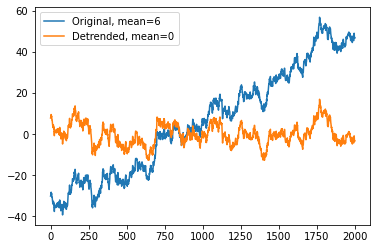

In [6]:
# create signal with linear trend imposed
n = 2000
signal = np.cumsum(np.random.randn(n)) + np.linspace(-30,30,n)

# linear detrending
detsignal = scipy.signal.detrend(signal)

# get means
omean = np.mean(signal) # original mean
dmean = np.mean(detsignal) # detrended mean

# plot signal and detrended signal
plt.plot(range(0,n),signal,label='Original, mean=%d' %omean)
plt.plot(range(0,n),detsignal,label='Detrended, mean=%d' %dmean)

plt.legend()
plt.show()

# day 400

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

# Remove non-linear trend with polynomials:

![sfs](images/010724_sig1.png)
![sfs](images/010724_sig2.png)

## goal:
* remove the nonlinear slowdrift trend and smoothen a nonlinear function with `George Horner polynomial algorithm.`

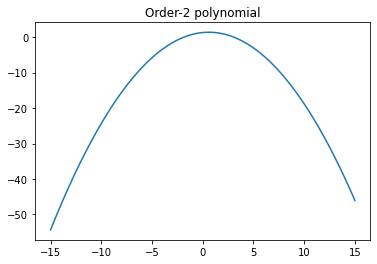

In [13]:
# code
## polynomial intuition

order = 2
x = np.linspace(-15,15,100)

y = np.zeros(len(x))

for i in range(order+1):
    y = y + np.random.randn(1)*x**i

plt.plot(x,y)
plt.title('Order-%d polynomial' %order)
plt.show()


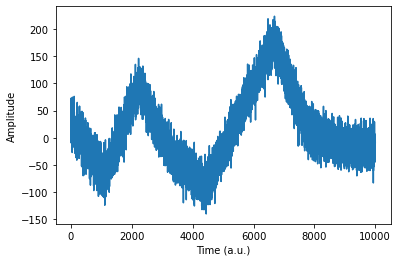

In [2]:
## generate signal with slow polynomial artifact

n = 10000
t = range(n)
k = 10 # number of poles for random amplitudes

# slowdrift is the noise in the function that we are concerned about removing to smoothened signal.
slowdrift = np.interp(np.linspace(1,k,n),np.arange(0,k),100*np.random.randn(k))
signal =  slowdrift + 20*np.random.randn(n)

# plot
plt.plot(t,signal)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.show()

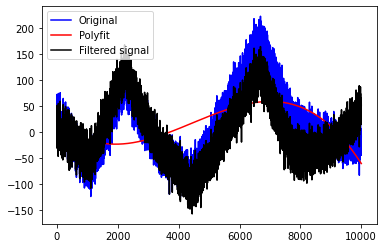

In [3]:
## fit a 3-order polynomial

# polynomial fit (returns coefficients)
beta = np.polyfit(t,signal,3)

# predicted data is evaluation of polynomial
yHat = np.polyval(beta,t)

# compute residual (the cleaned signal)
residual = signal - yHat


# now plot the fit (the function that will be removed)
plt.plot(t,signal,'b',label='Original')
plt.plot(t,yHat,'r',label='Polyfit')
plt.plot(t,residual,'k',label='Filtered signal')

plt.legend()
plt.show()

* unfortunately the degree of order 3 was not enough to capture the actual polynomial data it seems. lets try with a better degree.

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

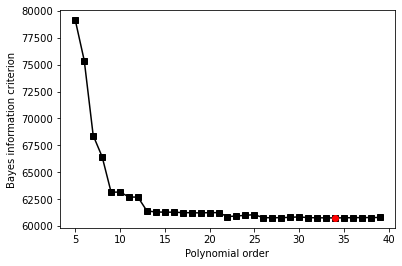

In [4]:
## Bayes information criterion to find optimal order

# possible orders
orders = range(5,40)

# sum of squared errors (sse is reserved!)
sse1 = np.zeros(len(orders))

# loop through orders
for ri in range(len(orders)):

    # compute polynomial (fitting time series)
    
    beta = np.polyfit(t,signal,orders[ri])
    yHat = np.polyval(beta,t)

    # compute fit of model to data (sum of squared errors)
    sse1[ri] = np.sum( (yHat-signal)**2 )/n


# Bayes information criterion bic = n*log(sse) + k*log(n)
bic = n*np.log(sse1) + orders*np.log(n)

# best parameter has lowest BIC
bestP = min(bic)
min_idx = np.argmin(bic)

# plot the BIC
plt.plot(orders,bic,'ks-')
plt.plot(orders[min_idx],bestP,'ro')
plt.xlabel('Polynomial order')
plt.ylabel('Bayes information criterion')
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


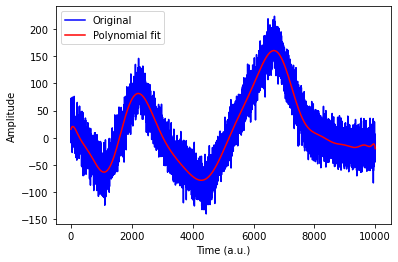

In [7]:
## now repeat filter for best (smallest) BIC

# polynomial fit
polycoefs = np.polyfit(t,signal,orders[min_idx])

# estimated data based on the coefficients
yHat = np.polyval(polycoefs,t)

# filtered signal is residual
filtsig = signal - yHat

## plotting
plt.plot(t,signal,'b',label='Original')
plt.plot(t,yHat,'r',label='Polynomial fit')
# plt.plot(t,filtsig,'k',label='Filtered')

plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

* now better isn't it?

# day 402

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy import *
import copy

# Average multiple repitions:

![fsfs](images/040724_sig.png)
![fsfs](images/040724_sig1.png)

* the philosophy behind this process: we are just the average of 5 most frequented people, the trajectory an RL agent takes to reach its target can be numerous and it varies in each episode but we can average all the trajectories to get that one single trajectory(to make our agent be decisive), you are just the average of all the books you read, all the information you put in your mind, all the people you interact with.
* The idea this averaging multiple repititions: we record signals a system a give off and in order to reduce the noise in each new recordings, the noise may be due to the stochastic element(s) in the environment or simply due to unreliable sensor technology in the device, can be attenuated(reduced) by taking the average of all recorded signals.
* we begin the recording only when some major events happen(to save us time or rather our excuse to the process of mundanity of analysing these boring signals)

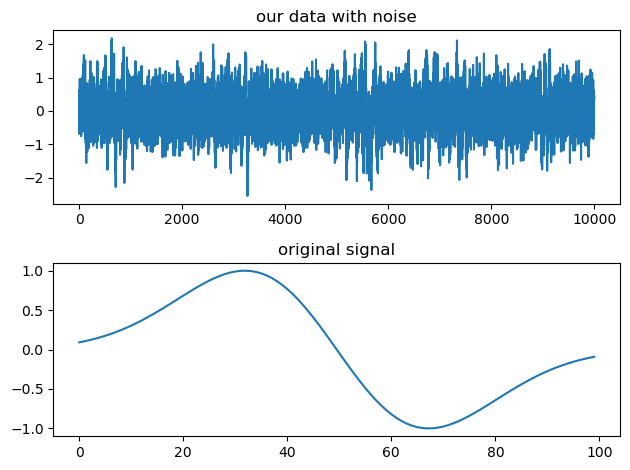

In [53]:
## code:

## simulate data

# create event (derivative of Gaussian)
k = 100 # duration of event in time points
event = np.diff(np.exp( -np.linspace(-2,2,k+1)**2 )) # delta y
event = event/np.max(event) # normalize to max=1

# event onset times
Nevents = 30
onsettimes = np.random.permutation(10000-k)
onsettimes = onsettimes[0:Nevents]

# put event into data
data = np.zeros(10000)
for ei in range(Nevents):
    data[onsettimes[ei]:onsettimes[ei]+k] = event # create 10000 lines of signals

# add noise
data = data + .5*np.random.randn(len(data)) # add noise to them to give vareity; randomness removes boredom.

# plot data
plt.subplot(211)
plt.plot(data)
plt.title('our data with noise')

# plot one event
plt.subplot(212)
# plt.plot(range(k), data[onsettimes[3]:onsettimes[3]+k]) # pick one random event out of many events.
plt.plot(range(k), event)
plt.title('original signal')

plt.tight_layout()
plt.show()

## exploration, ablation-analysis and freethrows

In [6]:
np.random.permutation(5) 

array([2, 4, 1, 0, 3])

shuffles the indices

In [7]:
onsettimes

array([3755, 2427, 8239,  499, 2243, 4876, 6443, 3347, 3411, 2170, 9267,
       5543, 4384, 1167, 2883, 2945, 7870, 6354, 2454, 5310, 6026, 1609,
       3868,  355, 6422, 5391, 3194, 6737, 5444, 8585])

In [15]:
len(onsettimes)

30

In [55]:
len(event)

100

In [8]:
len(data)

10000

In [10]:
onsettimes[3],onsettimes[3]+k

(499, 599)

In [11]:
onsettimes[4],onsettimes[4]+k

(2243, 2343)

In [12]:
onsettimes[5],onsettimes[5]+k

(4876, 4976)

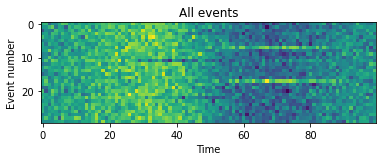

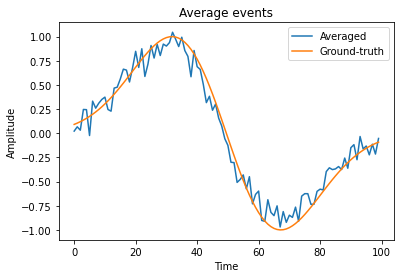

In [23]:
## extract all events into a matrix

datamatrix = np.zeros((Nevents,k))

for ei in range(Nevents):
    datamatrix[ei,:] = data[onsettimes[ei]:onsettimes[ei]+k]

plt.imshow(datamatrix)
plt.xlabel('Time')
plt.ylabel('Event number')
plt.title('All events')
plt.show()

plt.plot(range(0,k),np.mean(datamatrix,axis=0),label='Averaged')
plt.plot(range(0,k),event,label='Ground-truth')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Average events')
plt.show()



## conclusion:
* we added event + noise as individual data slots(column vectors).
* but finally when averaging these signals we are somehow able to attenuate these noise and get close to the actual Truth.
* quite amazing, isn't it?

## exploration, ablation-analysis and freethrows

In [17]:
# testing how np.mean(axis=0) works across matrices
A = np.random.randint(0,4,(3,3))

A

array([[0, 0, 0],
       [1, 3, 1],
       [0, 3, 2]])

In [18]:
np.mean(A,axis=0)

array([0.33333333, 2.        , 1.        ])

* finds means across rows

In [19]:
np.mean(A,axis=1)

array([0.        , 1.66666667, 1.66666667])

# day 403

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

# Remove Artifacts from Data via least-squares template matching technique:


![sfsf](images/050724_sig.png)

* an artifact could be some induced signal, or some unwanted signal that you want to remove from the observed data.
* here the orange plot is observed data 
* the blue plot is the induced artifact in the data which is a subset of the observed data.

![sfsf](images/050724_sig1.png)
* to remove the induced or unwanted artifact from the observed data we use least square method to eject it out.
* we use left inverse with the observed data to calculate the beta coefficients(weights of our model)
* we then multiply that with the design matrix to get the predicted artifact vector.
* we then subtract it from the observed data to eject that shit out.
* `residual would be the remains of the data without that artifact in it.`

## description of the components in the prediction vector or matrix:
![sfsf](images/050724_sig2.png)


## how to create the design matrix:
![sfsf](images/050724_sig3.png)

* if the artifact is just one channel, then the design matrix would have 1,1,1 .....n for the first column vector and the artifact channel on the 2nd column vector till n. 
* n is the cardinality of Time vector.

## Example application:
* when you measure the signals coming from the Brain using a Electro Encephalogram(EEG) even a minute disturbance caused by something as trivial as movement of eyes would bring in unwanted noises in the recordings. so, EOG here is the recording of eye movements(the artifact) while measuring the signals from the brain(EEG).
* so, we want to clean the dirt from EEG, rid itself of the EOG artifact.
* By the way, EOG stands for Electro Oculo Gram

In [6]:
## code illustration:

# load dataset
matdat = sio.loadmat('time_series_denoising/templateProjection.mat')
EEGdat = matdat['EEGdat'] # artifact
eyedat = matdat['eyedat'] # actual
timevec = matdat['timevec'][0] # time vector
MN = np.shape(EEGdat) # matrix sizes

# initialize residual data
resdat = np.zeros(np.shape(EEGdat))


# loop over trials
for triali in range(MN[1]): ## the rank of the matrix is goingto be just MN[1] because it is the least.

    # build the least-squares model as intercept and EOG from this trial
    X = np.column_stack((np.ones(len(timevec)),eyedat[:,triali]))
    y = EEGdat[:,triali]

    # compute regression coefficients for EEG channel
    b = np.linalg.solve(X.T@X,X.T@y)

    # predicted data
    yHat = X@b

    # new data are the residuals after projecting out the best EKG fit
    resdat[:,triali] = EEGdat[:,triali] - yHat

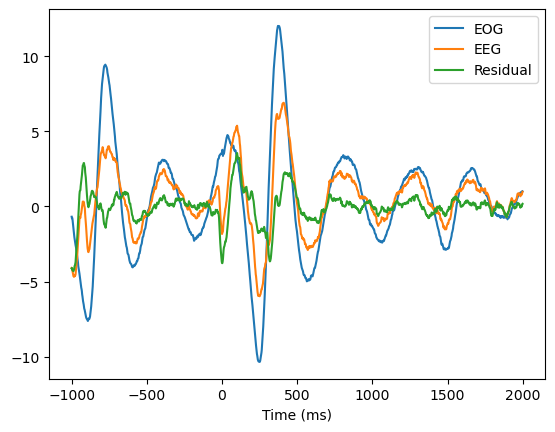

In [8]:
### plotting

# trial averages
plt.plot(timevec,np.mean(eyedat,axis=1),label='EOG')
plt.plot(timevec,np.mean(EEGdat,axis=1),label='EEG')
plt.plot(timevec,np.mean(resdat,1),label='Residual')

plt.xlabel('Time (ms)')
plt.legend()
plt.show()

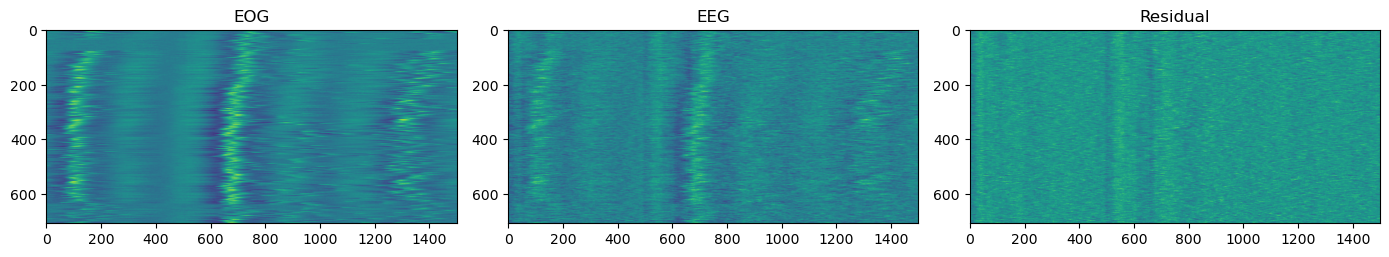

In [10]:
# show all trials in a map
clim = [-1,1]*20
plt.figure(figsize=(14,5))
plt.subplot(131)
plt.imshow(eyedat.T)
plt.title('EOG')


plt.subplot(132)
plt.imshow(EEGdat.T)
plt.title('EEG')


plt.subplot(133)
plt.imshow(resdat.T)
plt.title('Residual')

plt.tight_layout()
plt.show()

* you remove EOG from the EEG to get Residual.
* Residual is the real signal from the brain.

## exploration, ablation-analysis and freethrows

In [5]:
matdat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Aug 27 19:26:14 2018',
 '__version__': '1.0',
 '__globals__': [],
 'EEGdat': array([[ -5.5147605,   8.270843 , -13.398918 , ...,  -7.3868265,
          -3.7998462,  -8.838816 ],
        [ -5.9334717,   8.024627 , -13.873295 , ...,  -8.953201 ,
          -2.9133897,  -7.6915445],
        [ -6.5175643,   5.367308 ,  -9.478604 , ..., -12.452562 ,
          -1.9756736,  -5.2166014],
        ...,
        [  6.8552203,  14.892766 ,  -6.7963433, ...,   1.1399121,
          -3.3655522,   7.4696045],
        [  7.1147723,  14.2653885,  -7.493067 , ...,   1.397844 ,
          -3.4317026,   8.100368 ],
        [  5.605736 ,  15.1036825,  -8.205979 , ...,   3.6935341,
          -1.9793766,   5.4500775]], dtype=float32),
 'eyedat': array([[ -0.27836522,   7.405227  ,   5.300141  , ..., -14.284152  ,
          -3.0606122 ,  -2.983127  ],
        [ -0.46494254,   9.553032  ,   5.141752  , ..., -14.714427  ,
          -3.3555255 

In [24]:
EEGdat.shape,eyedat.shape,matdat['timevec'].shape

((1500, 707), (1500, 707), (1, 1500))

array([[ -0.27836522,   7.405227  ,   5.300141  , ..., -14.284152  ,
         -3.0606122 ,  -2.983127  ],
       [ -0.46494254,   9.553032  ,   5.141752  , ..., -14.714427  ,
         -3.3555255 ,  -0.9719269 ],
       [ -0.582488  ,   9.516302  ,   5.456946  , ..., -15.343351  ,
         -3.3679626 ,  -0.65352106],
       ...,
       [  3.2203598 ,  29.146402  ,  -6.500276  , ...,  -1.6077853 ,
         -2.1687324 ,   4.5009184 ],
       [  3.812082  ,  26.577322  ,  -7.5257416 , ...,  -4.0064034 ,
         -2.1033866 ,   4.7019978 ],
       [  5.0868096 ,  25.645529  ,  -7.3551497 , ...,  -5.4615526 ,
         -1.2981782 ,   5.4951153 ]], dtype=float32)

In [8]:
MN

(1500, 707)

* the rank of the matrix is going to be 707

In [10]:
X

array([[ 1.        , -2.98312712],
       [ 1.        , -0.97192693],
       [ 1.        , -0.65352106],
       ...,
       [ 1.        ,  4.50091839],
       [ 1.        ,  4.70199776],
       [ 1.        ,  5.49511528]])

In [9]:
X.shape

(1500, 2)

In [11]:
eyedat.shape

(1500, 707)

In [15]:
resdat.shape

(1500, 707)

In [20]:
len(timevec)

1500

# challenge:

* clean the noise and get the signal out of it and compare it with the cleaned version(it is a supervised learning challenge).


## constraints:
* since we have 1 row and many cols we cannot take left inverse. it is a full rank matrix so, we have to take right inverse instead.

# day 411 -day 417

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy
from matplotlib.pyplot import GridSpec

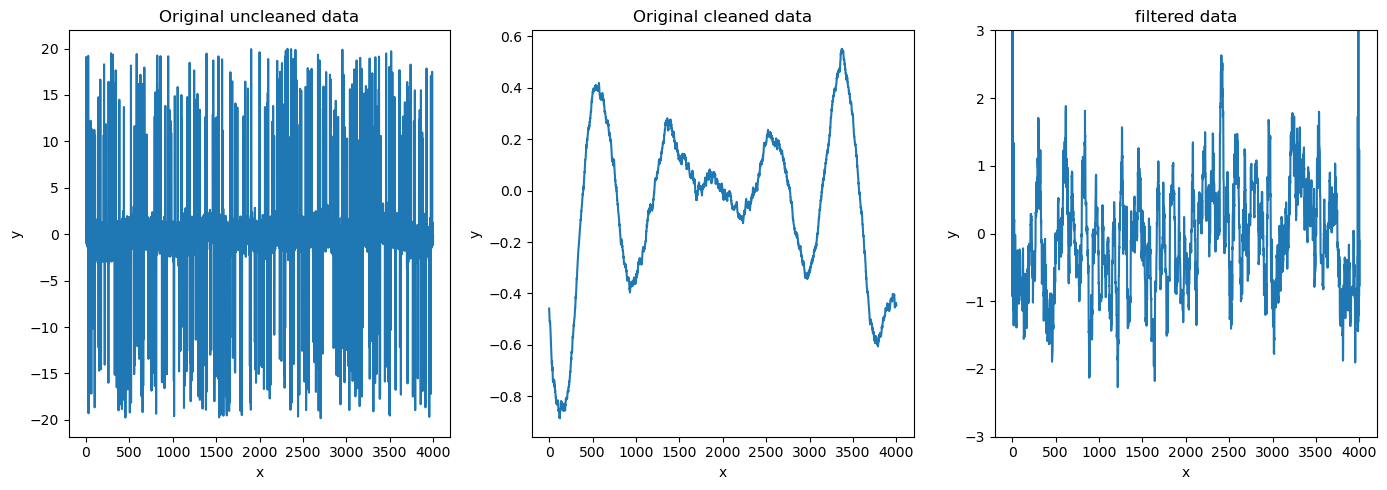

In [4]:
## code illustration:


# load dataset
matdata = sio.loadmat('time_series_denoising/denoising_codeChallenge.mat')
actual_sig = matdata['cleanedSignal'][0]
sig_with_noise = matdata['origSignal'][0]

mean_filtered_sig = copy.deepcopy(sig_with_noise)


# Try mean filtering.
k = 20 # window size
n = len(sig_with_noise) # total data points
for t in range(k,n-k):
    mean_filtered_sig[t] = np.mean(sig_with_noise[t-k:t+k+1])

# plot
fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,3,figure=fig)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax0.plot(sig_with_noise)
ax0.set_title('Original uncleaned data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax1.plot(actual_sig)
ax1.set_title('Original cleaned data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(mean_filtered_sig)
ax2.set_title('filtered data')
ax2.set_ylim([-3,3]) # most of the seems to fall within this range.
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

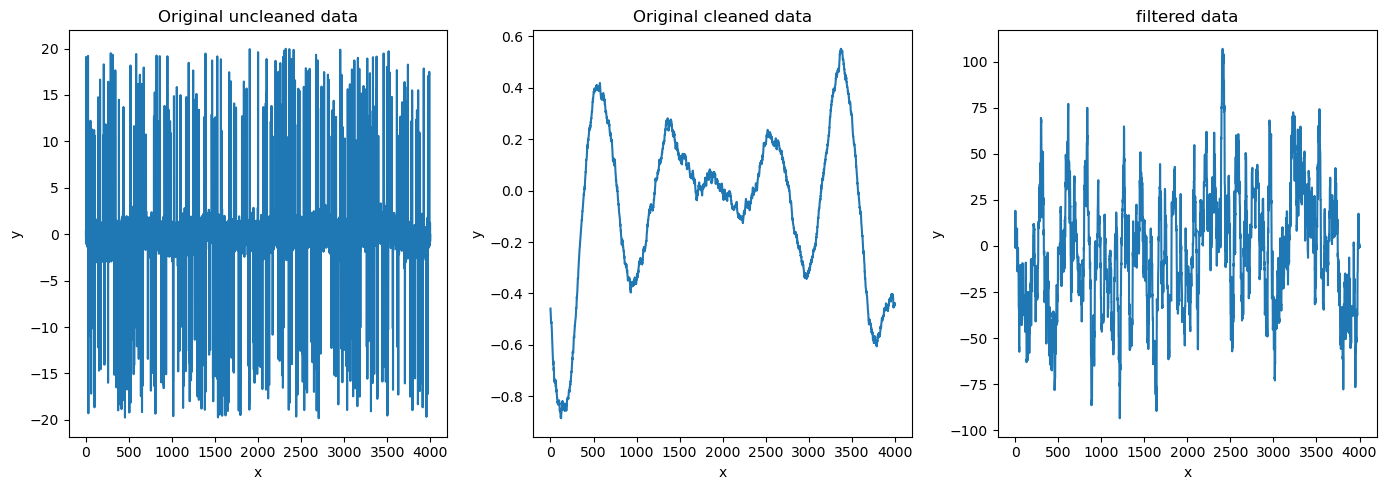

In [16]:
# try to apply guassian smoothness to original uncleaned data
gtime = np.arange(-k,k+1,1) # which is 2*k
fwhm = 40 # std, or the how smooth you want the filtering curve to be. more fwhm more smoothness.
guassian_curve_values = np.exp((-4*np.log(2)*gtime)/(fwhm**2))

gaus_filtered_sig = copy.deepcopy(sig_with_noise)
for t in range(k,n-k):
    gaus_filtered_sig[t] = np.sum(sig_with_noise[t-k:t+k+1]*guassian_curve_values)
    
# plotting
fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,3,figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(sig_with_noise)
ax0.set_title('Original uncleaned data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax1.plot(actual_sig)
ax1.set_title('Original cleaned data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(gaus_filtered_sig)
ax2.set_title('filtered data')
# ax2.set_ylim([-3,3]) # most of the seems to fall within this range.
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

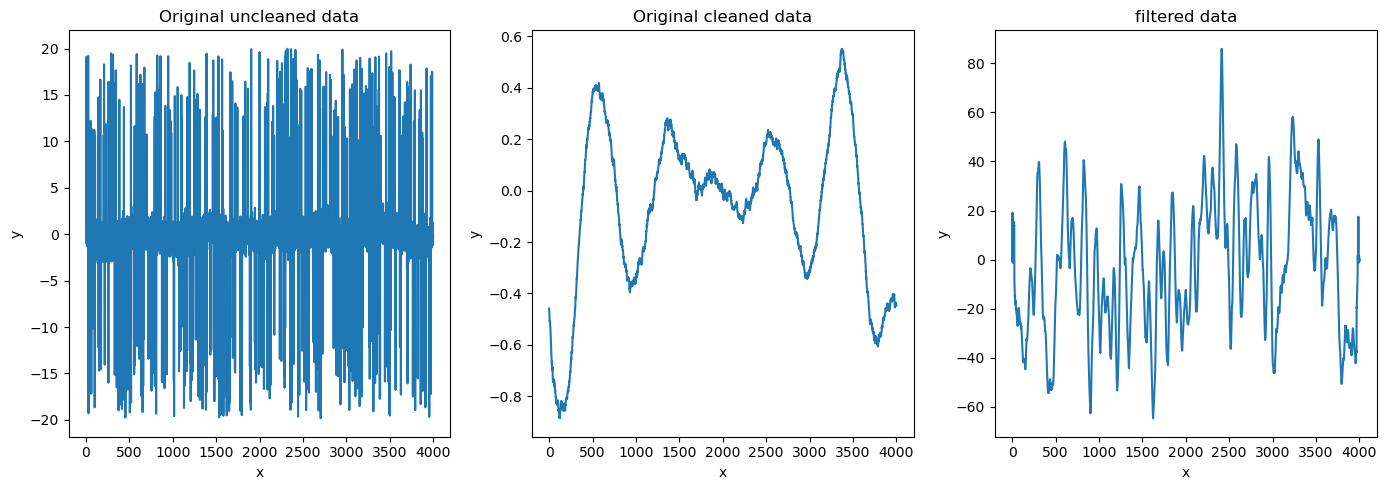

In [30]:
# try to apply guassian smoothness to mean filtered data
gtime = np.arange(-k,k+1,1)
gaussian_mean_filtered_sig = copy.deepcopy(mean_filtered_sig)

for t in range(k,n-k): # k is 20
    gaussian_mean_filtered_sig[t] = np.sum(mean_filtered_sig[t-k:t+k+1]*guassian_curve_values)


# plotting
fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,3,figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(sig_with_noise)
ax0.set_title('Original uncleaned data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax1.plot(actual_sig)
ax1.set_title('Original cleaned data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(gaussian_mean_filtered_sig)
ax2.set_title('filtered data')

ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()


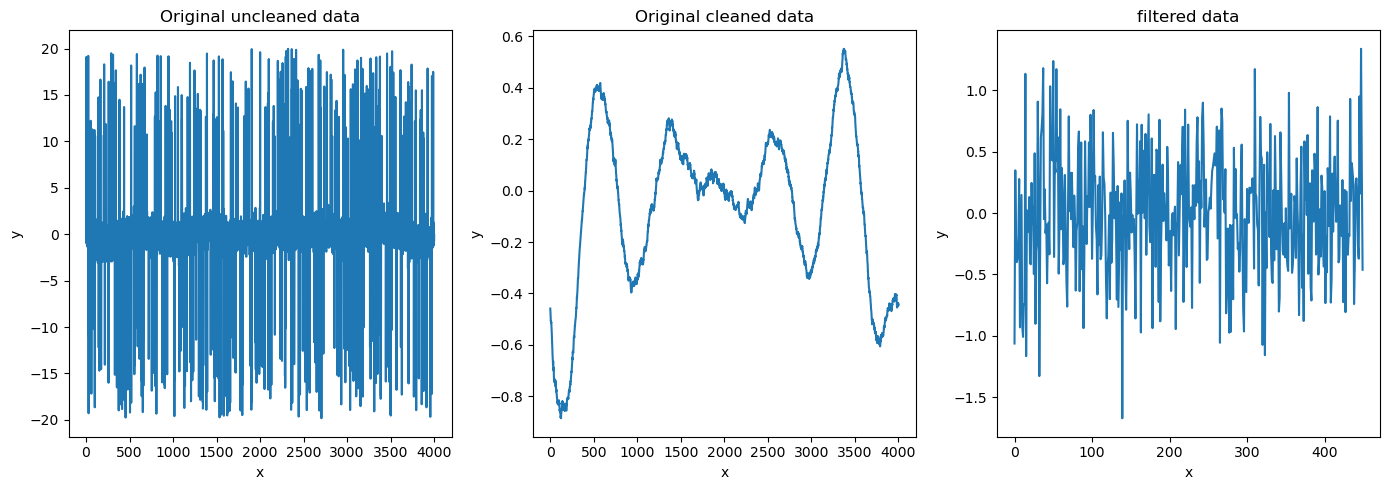

In [52]:
# average multiple repitions (take permutation of different indices) of mean filtered signal

## permute the indices of noise signal
population_size = len(mean_filtered_sig)
sample_size = 450
number_of_rep = 100

permutated_indices = np.random.permutation(population_size-sample_size)
permutated_indices = permutated_indices[0:number_of_rep]

## create the data matrices:
data_mat = np.zeros((number_of_rep,sample_size))

# mean_filtered_sig = mean_filtered_sig/np.max(mean_filtered_sig)
for i in range(len(permutated_indices)):
    data_mat[i,:] = sig_with_noise[permutated_indices[i]:permutated_indices[i]+sample_size]

average_of_multi_rep_sig = np.mean(data_mat,axis=0)

# plotting
fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,3,figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(sig_with_noise)
ax0.set_title('Original uncleaned data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax1.plot(actual_sig)
ax1.set_title('Original cleaned data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(average_of_multi_rep_sig)
ax2.set_title('filtered data')

ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()


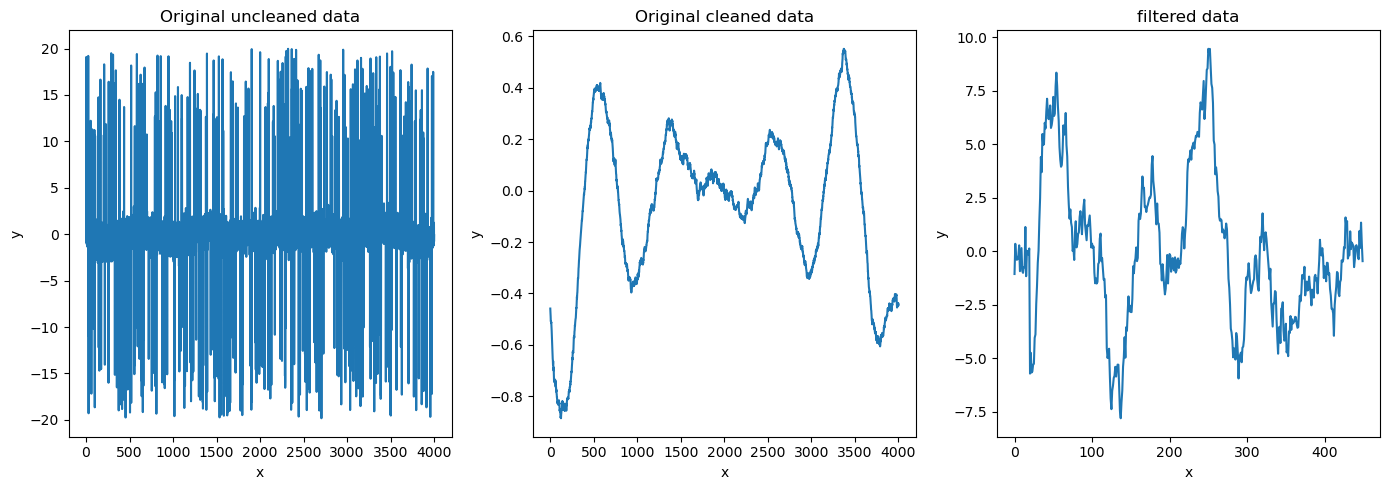

In [54]:
# try using gaussian with average of multiple repitition filtered data
k = 20
gtime = np.arange(-k,k+1,1)
fwhm = 400
gauss = np.exp((-4*np.log(2)*gtime)/(fwhm**2))
n = len(average_of_multi_rep_sig)

gaussian_mulit_average_filter = copy.deepcopy(average_of_multi_rep_sig)
for t in range(k,n-k):
    gaussian_mulit_average_filter[t] = np.sum(average_of_multi_rep_sig[t-k:t+k+1] * gauss)
    
    
# plotting
fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,3,figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(sig_with_noise)
ax0.set_title('Original uncleaned data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax1.plot(actual_sig)
ax1.set_title('Original cleaned data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(gaussian_mulit_average_filter)
ax2.set_title('filtered data')

ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()


### conclusion: didn't quite caputure it, does it?


In [35]:
# try median filter to remove the noise and outliers and use a moving guassian filter to get close to the cleaned signal


## this method first fills up the spaces with outliers with moving median value using a  window size k.
## next we run a guassian or moving mean filter over the outlier removed signal 

# load dataset
matdata = sio.loadmat('time_series_denoising/denoising_codeChallenge.mat')
actual_sig = matdata['cleanedSignal'][0]
sig_with_noise = matdata['origSignal'][0]


# use median filter to remove the outliers in sig_with_noise
outlier_removed_sig = copy.deepcopy(sig_with_noise)

# set the threshold beyond which everything will be considered an outlier and therefore be removed from the data
threshold = 5 # to remove those sticks in the original uncleaned data

# set window size and total data points size
k = 20


# this is how we remove outliers; prune the tree so that it doesn't become a nuisance to the pedastrians
suprathresh = np.where(sig_with_noise > threshold)[0]
n = len(sig_with_noise)

for t in range(len(suprathresh)):

    # setting boundaries so that we never go out of the indices of the data
    low_bound = np.max((1,suprathresh[t]-k))
    upper_bound = np.min((n,suprathresh[t]+k+1)) 

    # calculate the median now
    outlier_removed_sig[suprathresh[t]] = np.median(sig_with_noise[low_bound:upper_bound])

outlier_removed_sig

array([ 0.34069747, -0.29900363, -0.92773336, ...,  1.23675819,
       -0.77687497, -0.10484616])

In [167]:
suprathresh

array([   3,   25,   53,   71,   96,  104,  143,  164,  165,  204,  208,
        217,  229,  260,  266,  284,  289,  304,  310,  319,  320,  338,
        342,  384,  437,  518,  560,  584,  605,  608,  623,  627,  647,
        655,  672,  698,  791,  800,  818,  821,  823,  851,  858,  914,
        947,  962,  978,  982, 1023, 1056, 1099, 1102, 1167, 1194, 1246,
       1250, 1255, 1284, 1310, 1311, 1313, 1377, 1389, 1461, 1466, 1467,
       1484, 1504, 1526, 1568, 1576, 1664, 1680, 1685, 1722, 1744, 1815,
       1835, 1866, 1903, 2000, 2062, 2084, 2089, 2094, 2099, 2147, 2156,
       2168, 2203, 2212, 2219, 2236, 2242, 2252, 2258, 2280, 2284, 2294,
       2298, 2302, 2308, 2321, 2344, 2363, 2365, 2390, 2406, 2411, 2413,
       2417, 2422, 2429, 2461, 2467, 2480, 2531, 2542, 2548, 2553, 2555,
       2580, 2587, 2599, 2673, 2678, 2691, 2697, 2737, 2767, 2811, 2818,
       2828, 2863, 2873, 2878, 2893, 2905, 2953, 2954, 2957, 2961, 2970,
       2972, 2983, 3008, 3041, 3066, 3090, 3098, 31

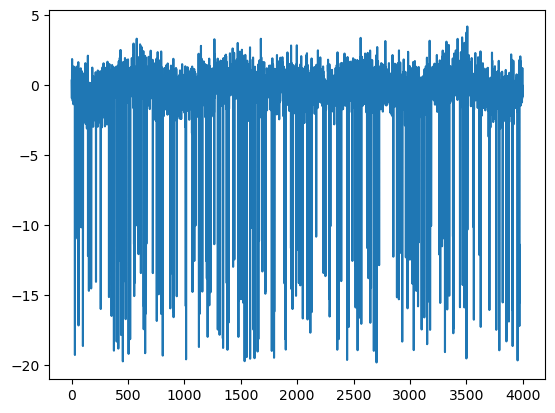

In [37]:
plt.plot(outlier_removed_sig)

In [107]:
# checking if the data has any nan values
outlier_removed_sig[np.isnan(outlier_removed_sig)]

array([], dtype=float64)

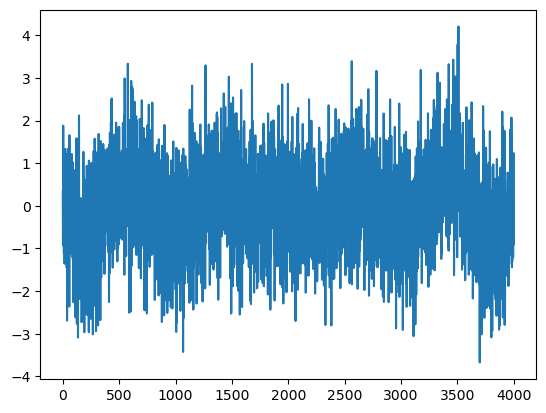

In [111]:
# remove/medianize the outlier for sticks in negative region
threshold = -5

prethresh = np.where(outlier_removed_sig < threshold)[0]

n = len(prethresh)

outlier_removed_sig2 = copy.deepcopy(outlier_removed_sig)
for i in range(len(prethresh)):
    low_bnd = np.min((1,prethresh[i]-k))
    upp_bnd = np.max((n,prethresh[i]+k+1))
    
    outlier_removed_sig2[prethresh[i]] = np.median(outlier_removed_sig[low_bnd:upp_bnd])

plt.plot(outlier_removed_sig2)

In [170]:
prethresh

array([  29,   33,   55,   61,   85,  100,  145,  150,  153,  173,  216,
        258,  331,  346,  354,  375,  399,  409,  414,  421,  438,  445,
        454,  460,  471,  476,  479,  505,  519,  553,  555,  561,  581,
        593,  614,  639,  641,  652,  659,  663,  720,  755,  772,  788,
        793,  808,  875,  887,  901,  904,  906,  932, 1012, 1015, 1072,
       1088, 1100, 1129, 1137, 1159, 1196, 1199, 1206, 1221, 1224, 1232,
       1265, 1296, 1297, 1312, 1341, 1343, 1344, 1375, 1382, 1392, 1432,
       1443, 1476, 1479, 1502, 1523, 1534, 1547, 1553, 1583, 1596, 1613,
       1622, 1624, 1649, 1656, 1662, 1692, 1716, 1718, 1775, 1795, 1797,
       1888, 1896, 1899, 1945, 1950, 1959, 1990, 2001, 2015, 2028, 2050,
       2092, 2104, 2117, 2129, 2169, 2233, 2250, 2251, 2285, 2288, 2289,
       2295, 2356, 2369, 2391, 2443, 2458, 2490, 2515, 2518, 2525, 2536,
       2541, 2543, 2554, 2569, 2620, 2632, 2649, 2655, 2680, 2704, 2708,
       2727, 2853, 2885, 2902, 2911, 2920, 2932, 29

In [113]:
len(outlier_removed_sig2)

4000

In [115]:
# fortunately there are no nan values now as before
outlier_removed_sig2[np.isnan(outlier_removed_sig2)]

array([], dtype=float64)

## conclusion about outlier_removal_process: 
* setting lower boundary and upper boundary for the suprathresh and prethresh are dynammically median selection criteria.
* for suprathresh the lower boundary is either 1, or suprathersh index - k whichever is maximum so that it doesn't go beyond the bounds of the original data. the upper is either n (len of data) or suprathresh index + k + 1 whichever is minimum so that it doesn't go beyond the original data.
* for prethresh, the lower boundary is either 1 or prethresh index -k whichever is minimum, it is because all the indices in the prethresh is greater than k because of how we got outlier_removed_sig. and the upper boundary is either n, or prethresh index + k +1 whichever is maximum, it is because prethresh has values far below n and it will never reach n. 

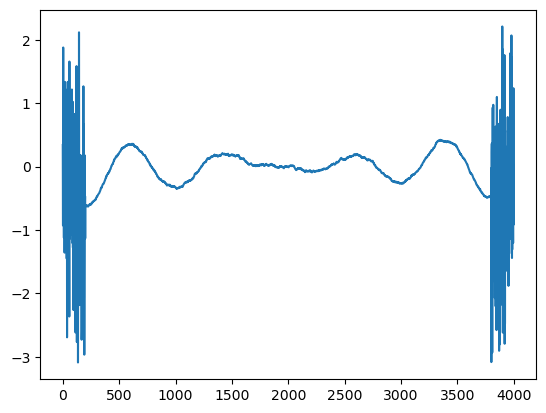

In [151]:
# run a moving mean filter as gaussian filter didn't seem to work
k = 200
gtime = np.arange(-k,k+1,1)
fwhm = 1000

gauss = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )

gauss = gauss/np.sum(gauss) # unit energy(normalized)
n = len(outlier_removed_sig2)

gaussian_filter = copy.deepcopy(outlier_removed_sig2)
for t in range(k,n-k):
    gaussian_filter[t] = np.sum(outlier_removed_sig2[t-k:t+k+1] * gauss)


plt.plot(gaussian_filter);

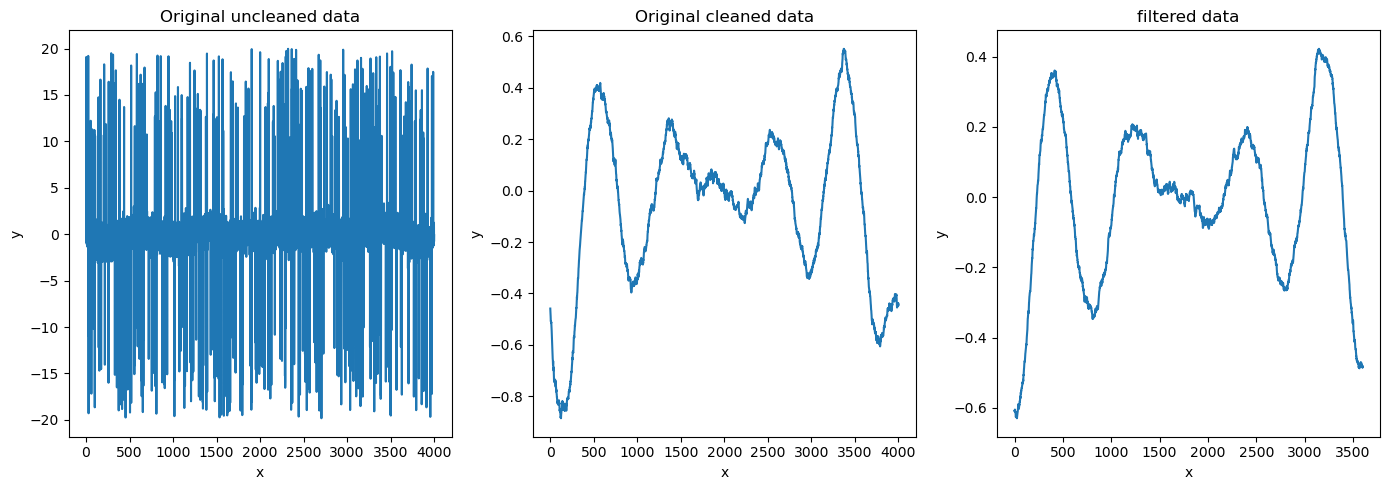

In [165]:
# plotting
fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,3,figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(sig_with_noise)
ax0.set_title('Original uncleaned data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

ax1.plot(actual_sig)
ax1.set_title('Original cleaned data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(gaussian_filter[200:3800]) # removing that superflous side sticks.
ax2.set_title('filtered data')
ax2.set_xlabel('x')
ax2.set_ylabel('y')


plt.tight_layout()
plt.show()


## conclusion: 
* so, if you have a signal with many insigficant outliers such as movement of hands in EEG recordings, or new objects a robot may come into contact with in the environment that are irrelevant to the task given to the robot, or train noise in an apartment near train track where train is frequent but it is pure noise (it may create high decibal sounds in the radar but just a pure noise), use outlier removal strategy deployed by this medianizing technique.
* and run a mean filter or gaussian filter to see the actual pattern in the signal recordings.